# 🪅 About this tutorial

In this tutorial, we will calculate MACCS (Molecular ACCess System) descriptors, which are widely used structural fingerprints in cheminformatics and drug discovery.

* MACCS descriptors encode the presence or absence of specific structural features in a molecule, such as functional groups, ring systems, and atom types, into a binary fingerprint. This allows for efficient similarity searching, clustering, and machine learning applications in chemical informatics.

* MACCS fingerprints consist of 166 bits, each representing a specific structural pattern. A bit is set to 1 if the corresponding feature is present in the molecule and 0 if it is absent.

* These fingerprints are particularly useful for comparing molecules and predicting biological activity because they capture key structural characteristics in a compact format.

In this tutorial, you will practice how to:

1. Load molecular structures from SMILES strings.
2. Generate MACCS fingerprints.
3. Interpret the resulting binary fingerprints and understand their meaning.
4. Use MACCS descriptors for molecule similarity analysis and clustering.

By the end of this tutorial, you will gain a deep understanding of MACCS fingerprints and how to apply them to real-world chemical data.

In [1]:
print('Hello from my first ML model')

Hello from my first ML model


# Mount Drive

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Modules

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

# Show all the columns of the dataframe
pd.set_option('display.max_columns', None)

# Show all the rows of the dataframe
pd.set_option('display.max_rows', None)

# Packages

In [ ]:
!pip install rdkit==2024.09.4 # RDKit in EDA was rdkit-2024.9.4 so we shall install the same version

# Data

In [7]:
# Load the pre-processed dataset (the one from CANONICAL SMILES)
# Path to dataset (change the path according to your Google Drive folders)
file_path = '/content/drive/Shared drives/99_Share/99_share_業務委託(Team Chen)/Preinterns (Elisa)/pint_iker_udem/datasets/Dataset1/CSD_EES_DB_with_canon_smiles.csv'

In [8]:
# Read the CSV file into a DataFrame
data = pd.read_csv(file_path)
data.head(10)

,Unnamed: 0,ID,doi,formula,NAts,SMILES,HOMO,LUMO,E(S1),f(S1),E(S2),f(S2),E(S3),f(S3),E(T1),E(T2),E(T3),canon_SMILES
0,0,AACFAZ10,10.1107/S0108270183005156,C26 H22 Cl2 N2 O6,36.0,COC1=C(C(OC1=O)c1ccccc1Cl)C(C)=NN=C(C)C1=C(OC)...,-7.548438,-1.912144,3.1382,0.0027,3.8297,1.1448,4.5310,0.0000,2.2270,2.8977,3.0885,COC1=C(C(C)=NN=C(C)C2=C(OC)C(=O)OC2c2ccccc2Cl)...
1,1,ABACIR,10.1107/S160053681103861X,C17 H21 N3 O4 S2,26.0,O=N(=O)c1ccccc1NCC1=CSC(=C1)S(=O)(=O)NC1CCCCC1,-7.675787,-1.725202,3.6720,0.0982,3.7456,0.0888,4.1316,0.0016,2.3255,2.8794,3.2735,O=[N+]([O-])c1ccccc1NCc1csc(S(=O)(=O)NC2CCCCC2)c1
2,2,ABADEO,10.1107/S1600536811039158,C30 H28 N6 O2,38.0,CN1N(c2ccccc2)C(=O)C(=C1C)N=Cc1ccccc1C=NC1=C(C...,-6.603659,-0.762191,3.9027,0.7900,4.0170,0.2765,4.1450,0.0455,2.6892,3.0039,3.5964,Cc1c(N=Cc2ccccc2C=Nc2c(C)n(C)n(-c3ccccc3)c2=O)...
3,3,ABADUE,10.1107/S1600536811039110,C17 H17 N1 O4,22.0,COc1cc(OC)c(C=CC(=O)c2ccccn2)c(OC)c1,-6.790057,-0.969814,3.3127,0.0001,3.9203,0.7088,4.6824,0.0265,2.5848,2.9294,3.9060,COc1cc(OC)c(C=CC(=O)c2ccccn2)c(OC)c1
4,4,ABAGAN,10.1107/S1600536811038177,C26 H17 O1 P1,28.0,O=P1(c2ccccc2)c2ccc3ccccc3c2c2c3ccccc3ccc12,-7.067613,-1.419890,3.6197,0.1814,4.2742,0.0073,4.4154,0.0007,2.5192,3.2095,3.8388,O=P1(c2ccccc2)c2ccc3ccccc3c2-c2c1ccc1ccccc21
5,5,ABAGIV,10.1107/S1600536811037846,C15 H15 N3 O2,20.0,Cc1ccccc1NN=C(C)c1cccc(c1)N(=O)=O,-6.770193,-1.357576,3.8514,0.0122,3.8722,0.2300,4.3338,0.5578,2.5031,2.7975,3.3850,CC(=NNc1ccccc1C)c1cccc([N+](=O)[O-])c1
6,6,ABAJUK,10.1107/S1600536811039195,C18 H16 Br1 N3 O3,25.0,COc1cc(Br)cc(C=NNC(=O)CC2=CNc3ccccc23)c1O,-6.843935,-0.841104,4.4786,0.0924,4.7004,0.0024,4.8926,0.8307,3.1227,3.7217,3.7772,COc1cc(Br)cc(C=NNC(=O)Cc2c[nH]c3ccccc23)c1O
7,7,ABAKIZ,10.1107/S1600536811035884,C14 H11 F1 N2,17.0,CCC(C=Cc1ccc(F)cc1)=C(C#N)C#N,-7.989807,-2.221265,4.0097,1.0049,5.0388,0.0000,5.4572,0.1008,2.3521,3.7973,4.5994,CCC(C=Cc1ccc(F)cc1)=C(C#N)C#N
8,8,ABALUM,10.1107/S1600536811037020,C10 H9 Cl1 N4 O1,16.0,CC1=NNC(=O)C1=NNc1ccc(Cl)cc1,-7.268433,-1.702072,3.5080,0.2448,3.6126,0.2456,4.2577,0.2544,1.7799,3.1298,3.3609,CC1=NNC(=O)C1=NNc1ccc(Cl)cc1
9,9,ABAMEX01,10.1016/j.jorganchem.2013.10.003,C23 H20 N4 O1,28.0,CC1=NN(C(=O)C1=C(Nc1ccccc1N)c1ccccc1)c1ccccc1,-6.608013,-1.017434,3.5670,0.2410,4.0175,0.2172,4.4869,0.0646,2.3688,3.5163,3.9357,CC1=NN(c2ccccc2)C(=O)C1=C(Nc1ccccc1N)c1ccccc1


In [9]:
# Drop the 'Unnamed: 0' column
data.drop(columns=['Unnamed: 0'], inplace=True)

In [10]:
data.head()

,ID,doi,formula,NAts,SMILES,HOMO,LUMO,E(S1),f(S1),E(S2),f(S2),E(S3),f(S3),E(T1),E(T2),E(T3),canon_SMILES
0,AACFAZ10,10.1107/S0108270183005156,C26 H22 Cl2 N2 O6,36.0,COC1=C(C(OC1=O)c1ccccc1Cl)C(C)=NN=C(C)C1=C(OC)...,-7.548438,-1.912144,3.1382,0.0027,3.8297,1.1448,4.5310,0.0000,2.2270,2.8977,3.0885,COC1=C(C(C)=NN=C(C)C2=C(OC)C(=O)OC2c2ccccc2Cl)...
1,ABACIR,10.1107/S160053681103861X,C17 H21 N3 O4 S2,26.0,O=N(=O)c1ccccc1NCC1=CSC(=C1)S(=O)(=O)NC1CCCCC1,-7.675787,-1.725202,3.6720,0.0982,3.7456,0.0888,4.1316,0.0016,2.3255,2.8794,3.2735,O=[N+]([O-])c1ccccc1NCc1csc(S(=O)(=O)NC2CCCCC2)c1
2,ABADEO,10.1107/S1600536811039158,C30 H28 N6 O2,38.0,CN1N(c2ccccc2)C(=O)C(=C1C)N=Cc1ccccc1C=NC1=C(C...,-6.603659,-0.762191,3.9027,0.7900,4.0170,0.2765,4.1450,0.0455,2.6892,3.0039,3.5964,Cc1c(N=Cc2ccccc2C=Nc2c(C)n(C)n(-c3ccccc3)c2=O)...
3,ABADUE,10.1107/S1600536811039110,C17 H17 N1 O4,22.0,COc1cc(OC)c(C=CC(=O)c2ccccn2)c(OC)c1,-6.790057,-0.969814,3.3127,0.0001,3.9203,0.7088,4.6824,0.0265,2.5848,2.9294,3.9060,COc1cc(OC)c(C=CC(=O)c2ccccn2)c(OC)c1
4,ABAGAN,10.1107/S1600536811038177,C26 H17 O1 P1,28.0,O=P1(c2ccccc2)c2ccc3ccccc3c2c2c3ccccc3ccc12,-7.067613,-1.419890,3.6197,0.1814,4.2742,0.0073,4.4154,0.0007,2.5192,3.2095,3.8388,O=P1(c2ccccc2)c2ccc3ccccc3c2-c2c1ccc1ccccc21


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47360 entries, 0 to 47359
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            47360 non-null  object 
 1   doi           42548 non-null  object 
 2   formula       47360 non-null  object 
 3   NAts          47360 non-null  float64
 4   SMILES        47360 non-null  object 
 5   HOMO          47360 non-null  float64
 6   LUMO          47360 non-null  float64
 7   E(S1)         47360 non-null  float64
 8   f(S1)         47360 non-null  float64
 9   E(S2)         47360 non-null  float64
 10  f(S2)         47360 non-null  float64
 11  E(S3)         47360 non-null  float64
 12  f(S3)         47360 non-null  float64
 13  E(T1)         47360 non-null  float64
 14  E(T2)         47360 non-null  float64
 15  E(T3)         47360 non-null  float64
 16  canon_SMILES  47360 non-null  object 
dtypes: float64(12), object(5)
memory usage: 6.1+ MB


In [15]:
# Check if there are nan(s) in data
data.isna().sum() # <<- No need to drop nan because nan are in the column DOI

,0
ID,0
doi,4812
formula,0
NAts,0
SMILES,0
HOMO,0
LUMO,0
E(S1),0
f(S1),0
E(S2),0


In [17]:
# Check for NaN in all the df
print("NaN values:", data.isna().sum().sum())

# Make a copy of data
df = data.copy()

# No need to drop nan because nan are in the column DOI

# Check the len of the data
print(len(df)) # Previously, we had 47360

NaN values: 4812
47360


In [18]:
df.columns

Index(['ID', 'doi', 'formula', 'NAts', 'SMILES', 'HOMO', 'LUMO', 'E(S1)',
       'f(S1)', 'E(S2)', 'f(S2)', 'E(S3)', 'f(S3)', 'E(T1)', 'E(T2)', 'E(T3)',
       'canon_SMILES'],
      dtype='object')

## Band gap


In [19]:
# We can predict HOMO and LUMO separately and then subtract HOMO from LUMO (LUMO-HUMO) for each data point to get the Band Gap.
# But we can also first do the substraction and predict the Band Gap.
# In this example, I will opt for the second option (predict the band gap)

df['band_gap'] = df['LUMO'] - df['HOMO']


# Drop the cols LUMO and HOMO
df.drop(columns=['LUMO', 'HOMO'], inplace=True)

In [20]:
# View the df
df.head(4)

,ID,doi,formula,NAts,SMILES,E(S1),f(S1),E(S2),f(S2),E(S3),f(S3),E(T1),E(T2),E(T3),canon_SMILES,band_gap
0,AACFAZ10,10.1107/S0108270183005156,C26 H22 Cl2 N2 O6,36.0,COC1=C(C(OC1=O)c1ccccc1Cl)C(C)=NN=C(C)C1=C(OC)...,3.1382,0.0027,3.8297,1.1448,4.5310,0.0000,2.2270,2.8977,3.0885,COC1=C(C(C)=NN=C(C)C2=C(OC)C(=O)OC2c2ccccc2Cl)...,5.636294
1,ABACIR,10.1107/S160053681103861X,C17 H21 N3 O4 S2,26.0,O=N(=O)c1ccccc1NCC1=CSC(=C1)S(=O)(=O)NC1CCCCC1,3.6720,0.0982,3.7456,0.0888,4.1316,0.0016,2.3255,2.8794,3.2735,O=[N+]([O-])c1ccccc1NCc1csc(S(=O)(=O)NC2CCCCC2)c1,5.950586
2,ABADEO,10.1107/S1600536811039158,C30 H28 N6 O2,38.0,CN1N(c2ccccc2)C(=O)C(=C1C)N=Cc1ccccc1C=NC1=C(C...,3.9027,0.7900,4.0170,0.2765,4.1450,0.0455,2.6892,3.0039,3.5964,Cc1c(N=Cc2ccccc2C=Nc2c(C)n(C)n(-c3ccccc3)c2=O)...,5.841468
3,ABADUE,10.1107/S1600536811039110,C17 H17 N1 O4,22.0,COc1cc(OC)c(C=CC(=O)c2ccccn2)c(OC)c1,3.3127,0.0001,3.9203,0.7088,4.6824,0.0265,2.5848,2.9294,3.9060,COc1cc(OC)c(C=CC(=O)c2ccccn2)c(OC)c1,5.820243


# 1. Generate MACCS keys (new type of descriptors/features)

Check out what is each key here --> https://github.com/rdkit/rdkit/blob/master/rdkit/Chem/MACCSkeys.py

QUESTION: what differences do you see between the MACCS keys and the RDKit 2D descriptors?

In [30]:
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
import pandas as pd

def generate_maccs_df(smiles_list, ids_list):
    """
    Generates a DataFrame in which each row corresponds to a molecule
    and each column represents the MACCS bits (0-166), indicating presence (1) or absence (0).

    Parameters:
    - smiles_list: List of SMILES strings.
    - ids_list: List of IDs corresponding to each SMILES string.

    Returns:
    - maccs_df: DataFrame where rows are molecules and columns are MACCS bits.
    """
    # Initialize an empty list to store each molecule's bit vector
    data = []

    # Loop through each SMILES string and ID
    for smile, mol_id in zip(smiles_list, ids_list):
        mol = Chem.MolFromSmiles(smile)
        if mol is not None:
            # Calculate MACCS keys for the molecule
            maccs_fp = rdMolDescriptors.GetMACCSKeysFingerprint(mol)
            # Append the bit vector and the molecule ID to the data list
            data.append([mol_id] + list(maccs_fp))

    # Create the DataFrame with the first column as IDs and remaining columns as bits 0-166
    column_names = ['ID'] + [f'Bit_{i}' for i in range(167)]
    maccs_df = pd.DataFrame(data, columns=column_names)
    maccs_df['canon_SMILES'] = smiles_list

    # Drop columns where all values are the same
    maccs_df = maccs_df.loc[:, (maccs_df.nunique() > 1)]

    return maccs_df

In [31]:
# To run the function, we will need the list of canonical smiles and the IDs of each smile
smiles_list = df['canon_SMILES'].tolist()
ids_list = df['ID'].tolist()

✨ **We can now use these bits as descriptors for our next QSPR model**

In [32]:
# Run the function for the first 200 smiles
test_maccs_df = generate_maccs_df(smiles_list[:200], ids_list)
test_maccs_df.head(10)

,ID,Bit_3,Bit_8,Bit_11,Bit_13,Bit_14,Bit_16,Bit_17,Bit_18,Bit_19,Bit_20,Bit_21,Bit_22,Bit_24,Bit_25,Bit_26,Bit_27,Bit_28,Bit_29,Bit_30,Bit_31,Bit_32,Bit_33,Bit_34,Bit_36,Bit_37,Bit_38,Bit_39,Bit_40,Bit_41,Bit_42,Bit_43,Bit_44,Bit_45,Bit_46,Bit_47,Bit_48,Bit_49,Bit_50,Bit_51,Bit_52,Bit_53,Bit_54,Bit_55,Bit_56,Bit_57,Bit_58,Bit_59,Bit_60,Bit_61,Bit_62,Bit_63,Bit_64,Bit_65,Bit_66,Bit_67,Bit_68,Bit_69,Bit_70,Bit_71,Bit_72,Bit_73,Bit_74,Bit_75,Bit_76,Bit_77,Bit_78,Bit_79,Bit_80,Bit_81,Bit_82,Bit_83,Bit_84,Bit_85,Bit_86,Bit_87,Bit_88,Bit_89,Bit_90,Bit_91,Bit_92,Bit_93,Bit_94,Bit_95,Bit_96,Bit_97,Bit_98,Bit_99,Bit_100,Bit_101,Bit_102,Bit_103,Bit_104,Bit_105,Bit_106,Bit_107,Bit_108,Bit_109,Bit_110,Bit_111,Bit_112,Bit_113,Bit_114,Bit_115,Bit_116,Bit_117,Bit_118,Bit_119,Bit_120,Bit_121,Bit_122,Bit_123,Bit_124,Bit_125,Bit_126,Bit_127,Bit_128,Bit_129,Bit_130,Bit_131,Bit_132,Bit_133,Bit_134,Bit_135,Bit_136,Bit_137,Bit_138,Bit_139,Bit_140,Bit_141,Bit_142,Bit_143,Bit_144,Bit_145,Bit_146,Bit_147,Bit_148,Bit_149,Bit_150,Bit_151,Bit_152,Bit_153,Bit_154,Bit_155,Bit_156,Bit_157,Bit_158,Bit_159,Bit_160,Bit_161,Bit_162,Bit_163,Bit_164,Bit_165,canon_SMILES
0,AACFAZ10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,1,1,0,0,0,0,0,0,1,0,1,1,0,0,1,1,1,1,1,1,1,0,0,1,1,0,1,0,1,0,1,1,0,1,1,1,1,1,1,1,COC1=C(C(C)=NN=C(C)C2=C(OC)C(=O)OC2c2ccccc2Cl)...
1,ABACIR,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,1,1,1,0,1,1,0,0,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,1,1,0,0,0,0,1,0,1,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,1,1,0,0,1,0,1,1,0,0,1,1,1,1,0,1,0,1,1,1,0,0,1,0,1,0,1,1,1,1,1,0,1,1,0,1,0,1,1,0,1,1,0,1,1,1,1,1,O=[N+]([O-])c1ccccc1NCc1csc(S(=O)(=O)NC2CCCCC2)c1
2,ABADEO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,1,1,0,1,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,0,1,1,1,1,1,0,0,1,1,1,0,0,0,1,0,1,0,1,1,1,1,1,1,1,1,Cc1c(N=Cc2ccccc2C=Nc2c(C)n(C)n(-c3ccccc3)c2=O)...
3,ABADUE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,1,1,1,0,0,1,1,0,1,0,1,0,1,1,0,1,1,1,1,1,1,1,COc1cc(OC)c(C=CC(=O)c2ccccn2)c(OC)c1
4,ABAGAN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,O=P1(c2ccccc2)c2ccc3ccccc3c2-c2c1ccc1ccccc21
5,ABAGIV,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,1,1,1,1,0,0,0,0,1,0,1,1,1,1,1,1,1,1,CC(=NNc1ccccc1C)c1cccc([N+](=O)[O-])c1
6,ABAJUK,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,1,1,1,1,1,1,0,0,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0,1,1,1,1,0,0,0,1,1,0,1,0,0,1,0,1,0,0,1,1,1,1,1,0,0,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,COc1cc(Br)cc(C=NNC(=O)Cc2c[nH]c3ccccc23)c1O
7,ABAKIZ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,0,1,CCC(C=Cc1cc

In [33]:
# Run the function for the full dataset
maccs_df = generate_maccs_df(smiles_list, ids_list)
maccs_df.head(10)

[03:02:51] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


,ID,Bit_3,Bit_8,Bit_11,Bit_13,Bit_14,Bit_15,Bit_16,Bit_17,Bit_18,Bit_19,Bit_20,Bit_21,Bit_22,Bit_23,Bit_24,Bit_25,Bit_26,Bit_27,Bit_28,Bit_29,Bit_30,Bit_31,Bit_32,Bit_33,Bit_34,Bit_36,Bit_37,Bit_38,Bit_39,Bit_40,Bit_41,Bit_42,Bit_43,Bit_44,Bit_45,Bit_46,Bit_47,Bit_48,Bit_49,Bit_50,Bit_51,Bit_52,Bit_53,Bit_54,Bit_55,Bit_56,Bit_57,Bit_58,Bit_59,Bit_60,Bit_61,Bit_62,Bit_63,Bit_64,Bit_65,Bit_66,Bit_67,Bit_68,Bit_69,Bit_70,Bit_71,Bit_72,Bit_73,Bit_74,Bit_75,Bit_76,Bit_77,Bit_78,Bit_79,Bit_80,Bit_81,Bit_82,Bit_83,Bit_84,Bit_85,Bit_86,Bit_87,Bit_88,Bit_89,Bit_90,Bit_91,Bit_92,Bit_93,Bit_94,Bit_95,Bit_96,Bit_97,Bit_98,Bit_99,Bit_100,Bit_101,Bit_102,Bit_103,Bit_104,Bit_105,Bit_106,Bit_107,Bit_108,Bit_109,Bit_110,Bit_111,Bit_112,Bit_113,Bit_114,Bit_115,Bit_116,Bit_117,Bit_118,Bit_119,Bit_120,Bit_121,Bit_122,Bit_123,Bit_124,Bit_125,Bit_126,Bit_127,Bit_128,Bit_129,Bit_130,Bit_131,Bit_132,Bit_133,Bit_134,Bit_135,Bit_136,Bit_137,Bit_138,Bit_139,Bit_140,Bit_141,Bit_142,Bit_143,Bit_144,Bit_145,Bit_146,Bit_147,Bit_148,Bit_149,Bit_150,Bit_151,Bit_152,Bit_153,Bit_154,Bit_155,Bit_156,Bit_157,Bit_158,Bit_159,Bit_160,Bit_161,Bit_162,Bit_163,Bit_164,Bit_165,canon_SMILES
0,AACFAZ10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,1,1,0,0,0,0,0,0,1,0,1,1,0,0,1,1,1,1,1,1,1,0,0,1,1,0,1,0,1,0,1,1,0,1,1,1,1,1,1,1,COC1=C(C(C)=NN=C(C)C2=C(OC)C(=O)OC2c2ccccc2Cl)...
1,ABACIR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,1,1,1,0,1,1,0,0,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,1,1,0,0,0,0,1,0,1,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,1,1,0,0,1,0,1,1,0,0,1,1,1,1,0,1,0,1,1,1,0,0,1,0,1,0,1,1,1,1,1,0,1,1,0,1,0,1,1,0,1,1,0,1,1,1,1,1,O=[N+]([O-])c1ccccc1NCc1csc(S(=O)(=O)NC2CCCCC2)c1
2,ABADEO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,1,1,0,1,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,0,1,1,1,1,1,0,0,1,1,1,0,0,0,1,0,1,0,1,1,1,1,1,1,1,1,Cc1c(N=Cc2ccccc2C=Nc2c(C)n(C)n(-c3ccccc3)c2=O)...
3,ABADUE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,1,1,1,0,0,1,1,0,1,0,1,0,1,1,0,1,1,1,1,1,1,1,COc1cc(OC)c(C=CC(=O)c2ccccn2)c(OC)c1
4,ABAGAN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,O=P1(c2ccccc2)c2ccc3ccccc3c2-c2c1ccc1ccccc21
5,ABAGIV,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,1,1,1,1,0,0,0,0,1,0,1,1,1,1,1,1,1,1,CC(=NNc1ccccc1C)c1cccc([N+](=O)[O-])c1
6,ABAJUK,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,1,1,1,1,1,1,0,0,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0,1,1,1,1,0,0,0,1,1,0,1,0,0,1,0,1,0,0,1,1,1,1,1,0,0,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,COc1cc(Br)cc(C=NNC(=O)Cc2c[nH]c3ccccc23)c1O
7,ABAKIZ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0

# 2. Interpret the resulting binary fingerprints and understand their meaning

In [29]:
# Extract row 1 in maccs_df as a DataFrame
row1_data = maccs_df.iloc[[1]].copy()

# Add the canonical SMILES to row1_data
row1_data['canon_SMILES'] = smiles_list[1]
row1_data

,ID,Bit_3,Bit_8,Bit_11,Bit_13,Bit_14,Bit_15,Bit_16,Bit_17,Bit_18,Bit_19,Bit_20,Bit_21,Bit_22,Bit_23,Bit_24,Bit_25,Bit_26,Bit_27,Bit_28,Bit_29,Bit_30,Bit_31,Bit_32,Bit_33,Bit_34,Bit_36,Bit_37,Bit_38,Bit_39,Bit_40,Bit_41,Bit_42,Bit_43,Bit_44,Bit_45,Bit_46,Bit_47,Bit_48,Bit_49,Bit_50,Bit_51,Bit_52,Bit_53,Bit_54,Bit_55,Bit_56,Bit_57,Bit_58,Bit_59,Bit_60,Bit_61,Bit_62,Bit_63,Bit_64,Bit_65,Bit_66,Bit_67,Bit_68,Bit_69,Bit_70,Bit_71,Bit_72,Bit_73,Bit_74,Bit_75,Bit_76,Bit_77,Bit_78,Bit_79,Bit_80,Bit_81,Bit_82,Bit_83,Bit_84,Bit_85,Bit_86,Bit_87,Bit_88,Bit_89,Bit_90,Bit_91,Bit_92,Bit_93,Bit_94,Bit_95,Bit_96,Bit_97,Bit_98,Bit_99,Bit_100,Bit_101,Bit_102,Bit_103,Bit_104,Bit_105,Bit_106,Bit_107,Bit_108,Bit_109,Bit_110,Bit_111,Bit_112,Bit_113,Bit_114,Bit_115,Bit_116,Bit_117,Bit_118,Bit_119,Bit_120,Bit_121,Bit_122,Bit_123,Bit_124,Bit_125,Bit_126,Bit_127,Bit_128,Bit_129,Bit_130,Bit_131,Bit_132,Bit_133,Bit_134,Bit_135,Bit_136,Bit_137,Bit_138,Bit_139,Bit_140,Bit_141,Bit_142,Bit_143,Bit_144,Bit_145,Bit_146,Bit_147,Bit_148,Bit_149,Bit_150,Bit_151,Bit_152,Bit_153,Bit_154,Bit_155,Bit_156,Bit_157,Bit_158,Bit_159,Bit_160,Bit_161,Bit_162,Bit_163,Bit_164,Bit_165,canon_SMILES
1,ABACIR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,1,1,1,0,1,1,0,0,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,1,1,0,0,0,0,1,0,1,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,1,1,0,0,1,0,1,1,0,0,1,1,1,1,0,1,0,1,1,1,0,0,1,0,1,0,1,1,1,1,1,0,1,1,0,1,0,1,1,0,1,1,0,1,1,1,1,1,O=[N+]([O-])c1ccccc1NCc1csc(S(=O)(=O)NC2CCCCC2)c1


fp is of type <class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
00000000000000000000000010000000110010000000000001010001101111011001011101000001011100001011001011001010101000011000011100101100111101011100101011111011010110110111110--> The lenght of fp is 167
167
99
68
Bit 60 is set.
True


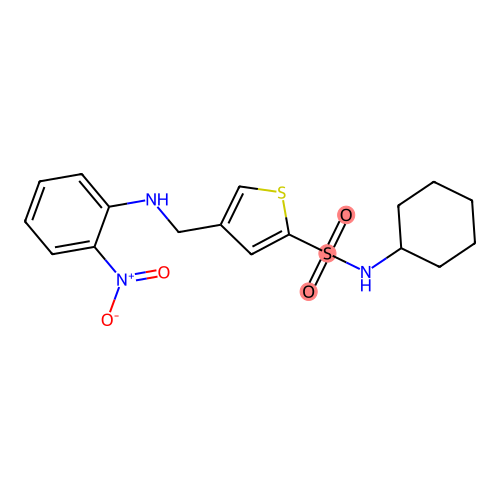

In [54]:
# Choose a bit to highlight (e.g. Bit_60)

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.rdMolDescriptors import GetMACCSKeysFingerprint

# Example SMILES
smiles = smiles_list[1]
mol = Chem.MolFromSmiles(smiles)

# Get MACCS fingerprint
fp = GetMACCSKeysFingerprint(mol)
print(f'fp is of type {type(fp)}') # Check the type

for i in range(len(fp)):
    print(fp[i], end='') # Print fp
print(f'--> The lenght of fp is {len(fp)}')

print(fp.GetNumBits()) # 167 bits
print(fp.GetNumOffBits()) # The count of bits=0
print(fp.GetNumOnBits()) # The count of bits=1

# Check if bit 60 is set
bit_idx = 60
if fp[bit_idx] == 1:
    print(f"Bit {bit_idx} is set.")

    # Define SMARTS pattern for a carbonyl group (bit 1)
    pattern = Chem.MolFromSmarts("[#16]=[#8]") # <<-- Check the substructure in the documentation of github  Bit 60: '[#16]=[#8]' S=O
    print(mol.HasSubstructMatch(pattern))

    # Find matching substructures
    matches = mol.GetSubstructMatches(pattern)
    highlight_atoms = [atom_idx for match in matches for atom_idx in match]

else:
    highlight_atoms = []

# Draw molecule with highlights
img = Draw.MolToImage(mol, highlightAtoms=highlight_atoms, size=(500, 500))
display(img)


👀 **Note** Keep in mind that the MACCS key is 166 bits long, but RDKit generates a 167-bit fingerprint. This is because list/vector indexing in many programming languages, including Python, starts at 0. To align with the original MACCS key numbering (1-166) instead of (0-165), the MACCS fingerprint is implemented as 167 bits, with Bit 0 always set to 0. Since Bit 0 is consistently OFF across all compounds, it does not impact the evaluation of molecular similarity. [Source](https://https://chem.libretexts.org/Courses/Intercollegiate_Courses/Cheminformatics/06%3A_Molecular_Similarity/6.04%3A_Python_Assignment)

# 3. Use MACCS descriptors for molecule similarity analysis and clustering.

🎬 Explanation:
* GetMACCSKeysFingerprint generates a 167-bit fingerprint for each molecule.
* DataStructs.TanimotoSimilarity computes the similarity between the two fingerprints.

🔍 Interpreting the Result:
* Tanimoto similarity = 1: Identical fingerprints.
* Tanimoto similarity = 0: No similarity.
* Values between 0 and 1 indicate varying levels of similarity.

In [55]:
from rdkit import Chem
from rdkit.Chem import DataStructs
from rdkit.Chem.rdMolDescriptors import GetMACCSKeysFingerprint

# Example SMILES
smiles1 = smiles_list[0]
smiles2 = smiles_list[1]

# Convert SMILES to molecule objects
mol1 = Chem.MolFromSmiles(smiles1)
mol2 = Chem.MolFromSmiles(smiles2)

# Generate MACCS fingerprints
fp1 = GetMACCSKeysFingerprint(mol1)
fp2 = GetMACCSKeysFingerprint(mol2)

# Compute Tanimoto similarity
similarity = DataStructs.TanimotoSimilarity(fp1, fp2)

# Output similarity
print(f"Tanimoto similarity between the two molecules: {similarity:.4f}")


Tanimoto similarity between the two molecules: 0.2366


👉🏼 To perform clustering on maccs_df, we can use several clustering techniques, such as K-means or DBSCAN. Since the data consists of binary vectors (MACCS keys), K-means clustering can work well, but we are required to specify the number of clusters upfront.

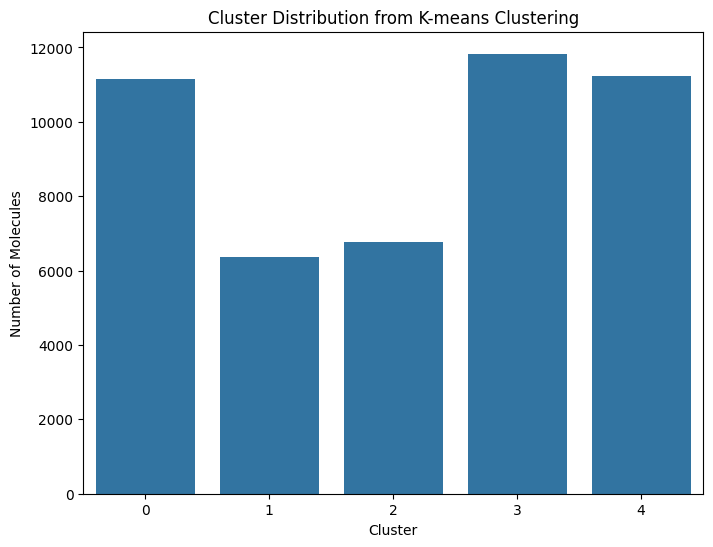

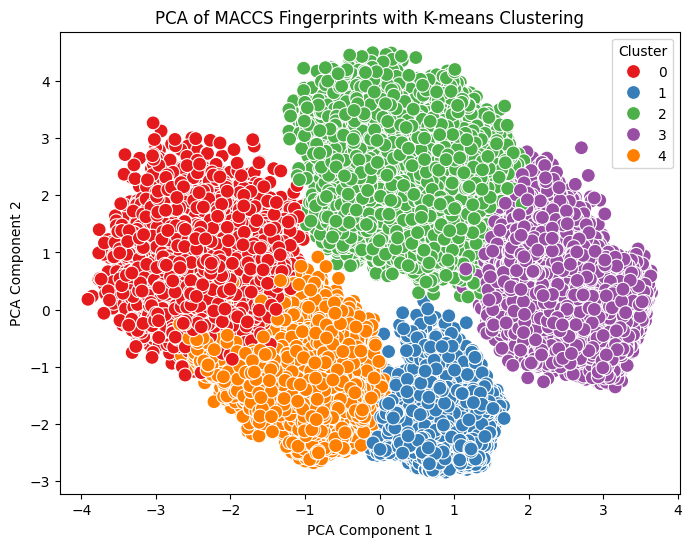

In [60]:
# Perfomr clustering on maccs_df

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming maccs_df is already generated using the provided function
# Step 1: Preprocess the data
# Extract the columns corresponding to MACCS bits (excluding 'ID' and 'canon_SMILES')
X = maccs_df.drop(columns=['ID', 'canon_SMILES'])

# Step 2: Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # You can adjust the number of clusters (n_clusters)
maccs_df['Cluster'] = kmeans.fit_predict(X)


# Step 3: Visualize the clusters using a bar plot of the cluster distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', data=maccs_df)
plt.title("Cluster Distribution from K-means Clustering")
plt.xlabel("Cluster")
plt.ylabel("Number of Molecules")
plt.show()

# Step 3: Optionally, reduce dimensions for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=maccs_df['Cluster'], palette='Set1', s=100)
plt.title("PCA of MACCS Fingerprints with K-means Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()
